In [1]:
!pip install transformers

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

import pandas as pd
from matplotlib import pyplot as plt
import os.path
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.2 MB/s 
     |████████████████████████████████| 7.6 MB 7.0 MB/s 
     |████████████████████████████████| 182 kB 18.7 MB/s 


In [2]:
pretrained_name = "sahri/indonesiasentiment"

sentiment_classifier = pipeline(
    "text-classification",
    model=pretrained_name,
    # tokenizer=AutoTokenizer.from_pretrained(pretrained_name)
    device=0
)

Downloading:   0%|          | 0.00/932 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/808k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/517k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [7]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!gdown https://drive.google.com/uc?id=1YuC8RKQMGN3asYQNPuhjjoIaDHMgevYM

Downloading...
From: https://drive.google.com/uc?id=1YuC8RKQMGN3asYQNPuhjjoIaDHMgevYM
To: /content/output_clean_text.csv
100% 631k/631k [00:00<00:00, 102MB/s]


In [30]:
df = pd.read_csv('output_clean_text.csv')
df = df.iloc[:, 1:]
df.head()

,Datetime,Text,source,clean_Text
0,2022-11-30 23:59:52+00:00,@keuangannews_id Jangan kan di jaman Rasululla...,twitter,jangan kan di jaman rasulullah di jaman luth ...
1,2022-11-30 23:58:54+00:00,Ayoooo aktivis lgbt mana suaranyaaaaa https://...,twitter,ayoooo aktivis lgbt mana suaranyaaaaa
2,2022-11-30 23:58:40+00:00,@keuangannews_id Bukan hanya di jaman nabi Muh...,twitter,bukan hanya di jaman nabi muhammad tapi jaman...
3,2022-11-30 23:57:59+00:00,@keuangannews_id Semakin aneh aja LGBT ko dili...,twitter,semakin aneh saja lgbt ko dilindungi mestinya...
4,2022-11-30 23:57:43+00:00,@keuangannews_id Melindungi keberadaan LGBT sb...,twitter,melindungi keberadaan lgbt sebagai manusia ma...


In [31]:
for i in range (len(df)):
  if len(df.clean_Text[i].split()) >= 182: # maximum inputnya agar bisa bekerja adalah sejumlah 182
    df.clean_Text[i] = ''
df_clean = df['clean_Text']
df_clean

0        jangan kan di jaman rasulullah di jaman luth ...
1                  ayoooo aktivis lgbt mana suaranyaaaaa 
2        bukan hanya di jaman nabi muhammad tapi jaman...
3        semakin aneh saja lgbt ko dilindungi mestinya...
4        melindungi keberadaan lgbt sebagai manusia ma...
                              ...                        
2117    kayaknya kau melebih lebihkan jumlah orang lgb...
2118    pskiatris yang dapat duit buat proposi studi g...
2119     tingkat kekerasan terhadap orang transgender ...
2120    meskipun sudah beda tapi sama saja sih nazi 4 ...
2121    look at op, he s a european cracker who thinks...
Name: clean_Text, Length: 2122, dtype: object

In [36]:
# pd.set_option('display.expand_frame_repr', False);

"""## Classify Text Sentiment"""

from tqdm import tqdm # library yang untuk melihat progress saat looping

sentiment_list = []

text_list = df_clean.tolist()

for i in tqdm(range(len(df))): 
  
  if(text_list[i] == ''):
    result = sentiment_classifier('neutral')[0]
    sentiment_list.append(result["label"])
  else:
    try:
      result = sentiment_classifier(text_list[i])[0]
    except:
      text_list[i] = ""
      result = sentiment_classifier('neutral')[0]
    sentiment_list.append(result["label"])

print(sentiment_list[:5])

# # print(indexToDrop)
# textLengthToDrop = []

# for i in indexToDrop:
#   textLengthToDrop.append(len(text_list[i].split()))
# print(f"minimum length classifier doesn't work: {min(textLengthToDrop)}")

"""## Load Sentiment Analysis Result to DataFrame"""

df["sentiment"] = sentiment_list
df["sentiment"].value_counts()

  0%|          | 0/2122 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/transformers/pipelines/base.py:1043: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 2122/2122 [00:22<00:00, 92.85it/s]

['negative', 'negative', 'negative', 'negative', 'negative']


negative    1472
neutral      393
positive     257
Name: sentiment, dtype: int64

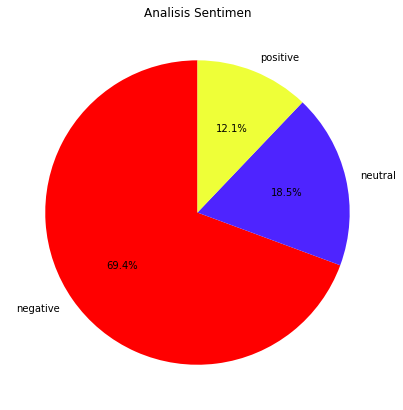

In [37]:
"""## Pie Chart"""

colors = ['#ff0000','#4e24ff','#eeff38']
# explode = (0, 0, 0.1)

piechart = df.groupby(["sentiment"])["Datetime"].count().plot.pie(autopct="%.1f%%", figsize=(7,7),  colors=colors, startangle=90) # Kali ini ga usah pakai explode aja
piechart.figure.patch.set_facecolor('white')
piechart.set_title('Analisis Sentimen')
piechart.yaxis.set_visible(False)
# piechart.figure.patch.set_alpha(0)

"""### Save Pie Chart Picture"""

# piechart.figure.savefig("/content/drive/Shareddrives/Tugas Data Engineering/SentimentAnalysis.png")
# path = "/content/drive"
fn = "LgbtSentimentPieChart.jpg"
piechart.figure.savefig("chart_sentimen.png")

In [43]:
"""## Load Sentiment Analysis Sample"""
pd.options.display.max_colwidth = 295
df[df["sentiment"] == "positive"][["clean_Text","sentiment"]].sample(5)

,clean_Text,sentiment
938,dana kampenye lgbt sangat besar buk dn sangat menjamin masa depan bukan begitu pak,positive
1697,asukan lgbt yunani pasukan elit terkuat dimasanya nia ramadhani mirip hobi,positive
1966,lgbtq,positive
1315,pernah nonton tedtalk yang argumennya lgbt in this case gay ada sebagai respon krisis. tujuannya untuk support komunitas kecilnya,positive
1233,salute sama qatar yang amat tegas mengenai lgbt.,positive


In [44]:
df[df["sentiment"] == "negative"][["clean_Text","sentiment"]].sample(5)

,clean_Text,sentiment
764,"apa insting menjilat itu terbentuk dari genetik keturunan? atau pergaulan? atau lewat kelainan semacam lgbt dll.? entahlah. aneh saja kok ada manusia yang begitu, dan kini muncul marak seiring maraknya lgbt",negative
1531,jiaah balik lagi ni orang yang tidak bisa bedain mana warna bendera lgbt mana bendera perdamaian italia,negative
172,kelompoknya ny memang selalu mendukung pada yang bertentangan dengan hukum agama. lalu mereka teriak mengatasnakan toleransi padahal agama manapun psti menolak yang namanya lgbt,negative
1741,sudah dibaptiskah? jinjingan bunglon pengikutnya lgbt.,negative
1049,"yang suka like rt berbau porn lgbt saya unfoll ya, kalau ada yang belum ke unfoll gpp langsung unfoll saya saja, saya risih banget sorry",negative


In [46]:
df[df["sentiment"] == "neutral"][["clean_Text","sentiment"]].sample(5)

,clean_Text,sentiment
727,"liberalizm haqida hech narsa qimay, uni lgbt deb ylaydigan klassik ortodoksial dindorning fikrlash tarzidan prinsipialno farqi y q bunaqa fikrlashning.",neutral
1893,ur emas 3 chisida yengil shapatila. ungacha bo lgan ishlar ham bor birodar. bularni liberallarni dunyp qarashadi lgbt bor bular hammas lgbt bo ladi desa kulganingizdek ularni kitobida bor deyish ularni ham jahlini chiqaradi. barcha dindorlarni bitta qolipga tiqmang.,neutral
64,dang,neutral
1602,gelandang jerman ilkay gundogan yang beragama islam minta polemik lgbt dihentikan,neutral
352,lgbt dni j,neutral
